In [79]:
import pandas as pd 
import numpy as np 

from sklearn import preprocessing
from sklearn import metrics

from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

pd.set_option("display.max_colwidth", -1)

import matplotlib.pyplot as plt 
import seaborn as sns

In [80]:
df= pd.read_csv("Training_Dataset.csv")

In [81]:
df["supplementary"] = df.mvar49
df["elite"] = df.mvar50
df["credit"] = df.mvar51

In [82]:
df.elite = df.elite*2
df.credit = df.credit*3

In [83]:
df["card_accepted"] = df.supplementary + df.credit + df.elite

In [84]:
df.drop(["supplementary", "elite", "credit"], axis=1, inplace=True)

In [85]:
df_supp= pd.crosstab( df.mvar40, df.mvar43)
df_supp.head()

mvar43,0,1,2,3,4,5
mvar40,,,,,,
0,30996,0,0,0,0,0
1,4962,1729,79,0,0,0
2,1033,556,208,15,0,0
3,151,117,80,16,2,0
4,10,18,16,7,0,0


In [86]:
for n in range(1,5):
    df_supp[n]=df_supp[n]/df_supp[0]

In [87]:
df_supp

mvar43,0,1,2,3,4,5
mvar40,,,,,,
0,30996,0.000000,0.000000,0.000000,0.000000,0
1,4962,0.348448,0.015921,0.000000,0.000000,0
2,1033,0.538238,0.201355,0.014521,0.000000,0
3,151,0.774834,0.529801,0.105960,0.013245,0
4,10,1.800000,1.600000,0.700000,0.000000,0
5,0,inf,NaN,inf,NaN,1


In [88]:
df_elite= pd.crosstab( df.mvar41, df.mvar44)
df_elite.head()

mvar44,0,1,2,3,4
mvar41,,,,,
0,37682,0,0,0,0
1,1583,235,0,0,0
2,117,6,309,0,0
3,9,2,14,37,0
4,0,0,1,3,2


In [89]:
for n in range(1,5):
    df_elite[n]=df_elite[n]/df_elite[0]

In [90]:
df_elite

mvar44,0,1,2,3,4
mvar41,,,,,
0,37682,0.000000,0.000000,0.000000,0.000000
1,1583,0.148452,0.000000,0.000000,0.000000
2,117,0.051282,2.641026,0.000000,0.000000
3,9,0.222222,1.555556,4.111111,0.000000
4,0,NaN,inf,inf,inf


In [113]:
sns.lmplot('mvar36', 'mvar16',
           data=df,
           fit_reg=False,
           hue="card_accepted",  
           scatter_kws={"marker": "D"})

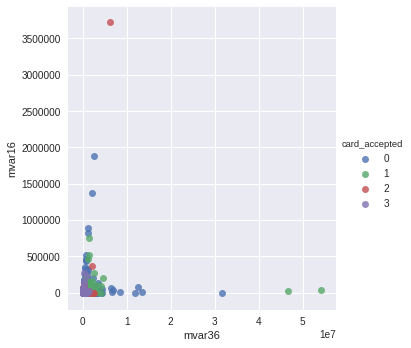

In [114]:
plt.show()

In [115]:
sns.lmplot('mvar36', 'mvar20',
           data=df,
           fit_reg=False,
           hue="card_accepted",  
           scatter_kws={"marker": "D"})

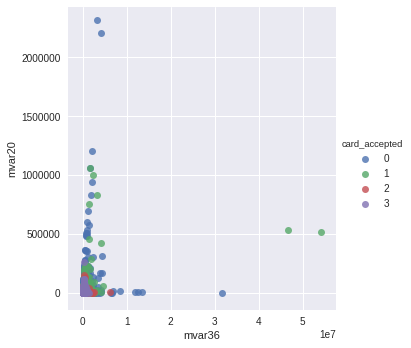

In [117]:
plt.show()

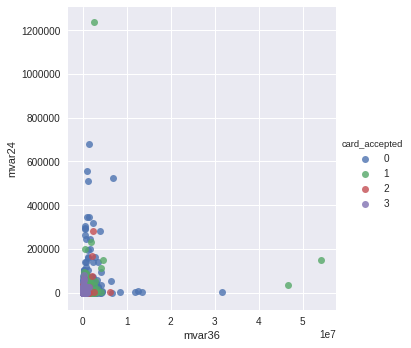

In [118]:
sns.lmplot('mvar36', 'mvar24',
           data=df,
           fit_reg=False,
           hue="card_accepted",  
           scatter_kws={"marker": "D"})
plt.show()

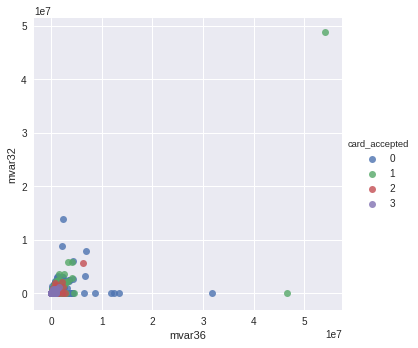

In [119]:
sns.lmplot('mvar36', 'mvar32',
           data=df,
           fit_reg=False,
           hue="card_accepted",  
           scatter_kws={"marker": "D"})
plt.show()

In [120]:
electronics = df.mvar16 + df.mvar17 +df.mvar18+ df.mvar19
travel = df.mvar20 + df.mvar21 +df.mvar22+ df.mvar23
household = df.mvar24 + df.mvar25 +df.mvar26+ df.mvar27
car = df.mvar28 + df.mvar29 +df.mvar30 + df.mvar31
retail= df.mvar32 + df.mvar33 +df.mvar34+ df.mvar35
spend= df.mvar36 + df.mvar37 +df.mvar38+ df.mvar39

In [123]:
df2= pd.DataFrame({
    "electronics":electronics,
    "travel":travel,
    "household":household,
    "car":car,
    "retail": retail,
    "spend": spend,
    "card_accepted": df.card_accepted
})

In [125]:
sns.pairplot(df2, hue="card_accepted")

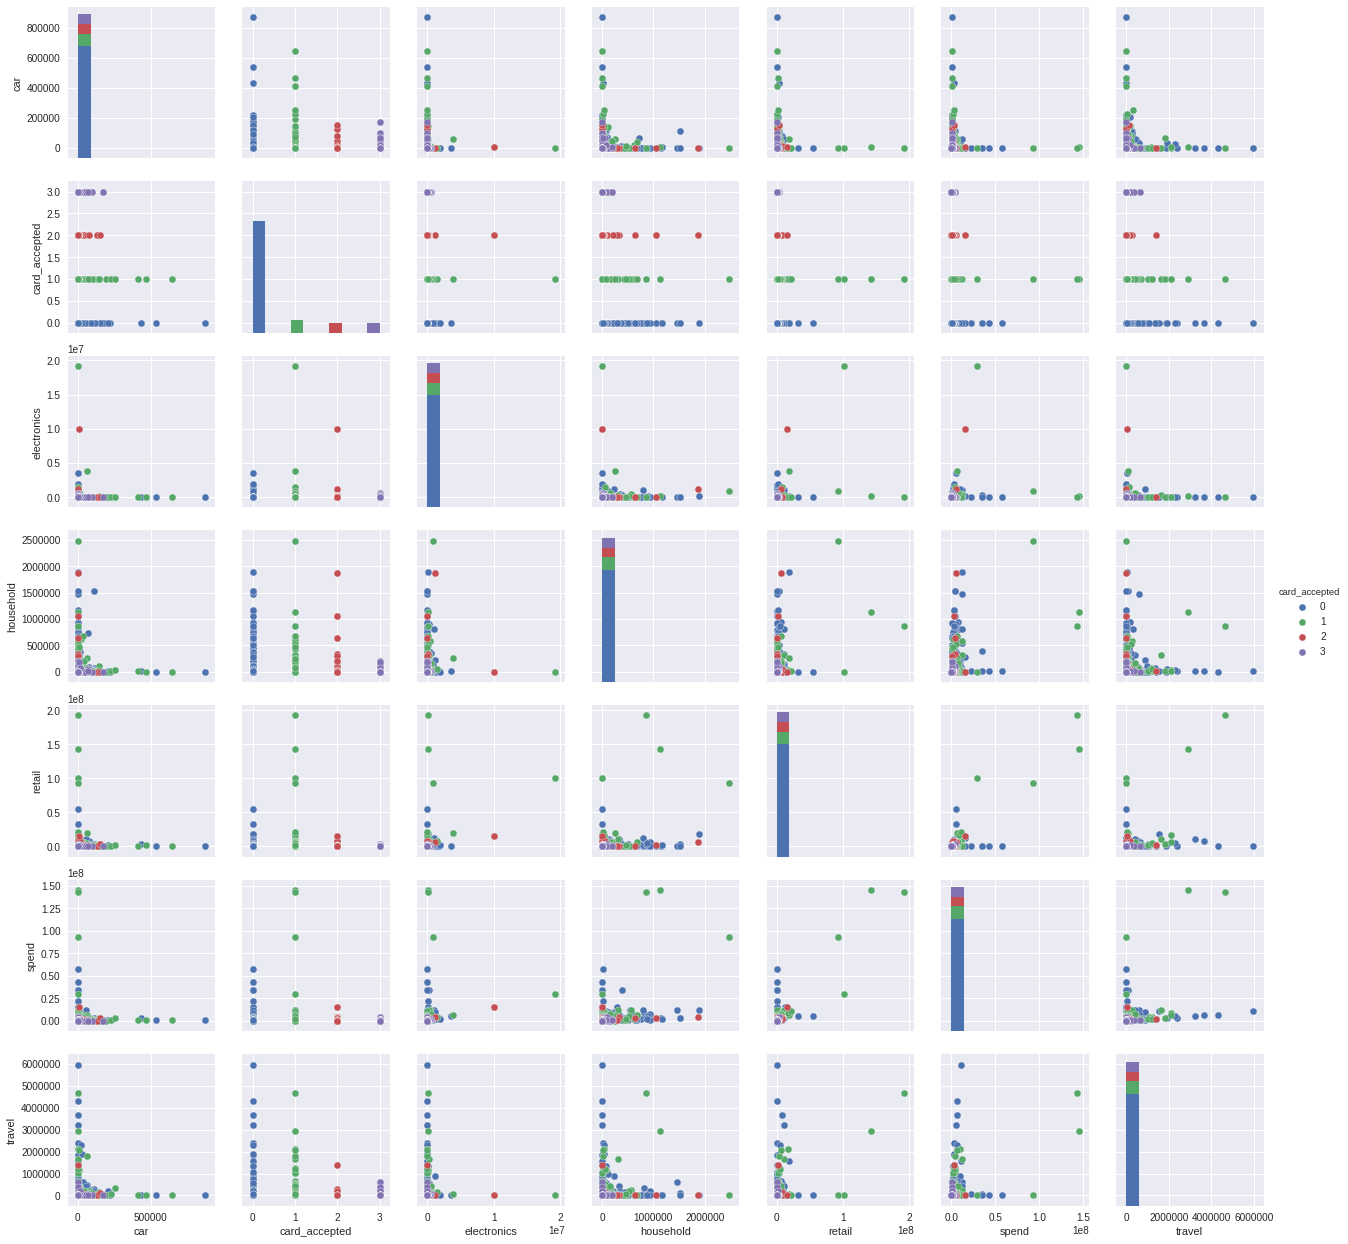

In [126]:
plt.show()